## Adiabatic Batch Reactor
You can download Fogler's book from here: https://doku.pub/download/h-scott-fogler-essentials-of-chemical-reaction-engineering-z0x2ze484wqn

2566.187033436299

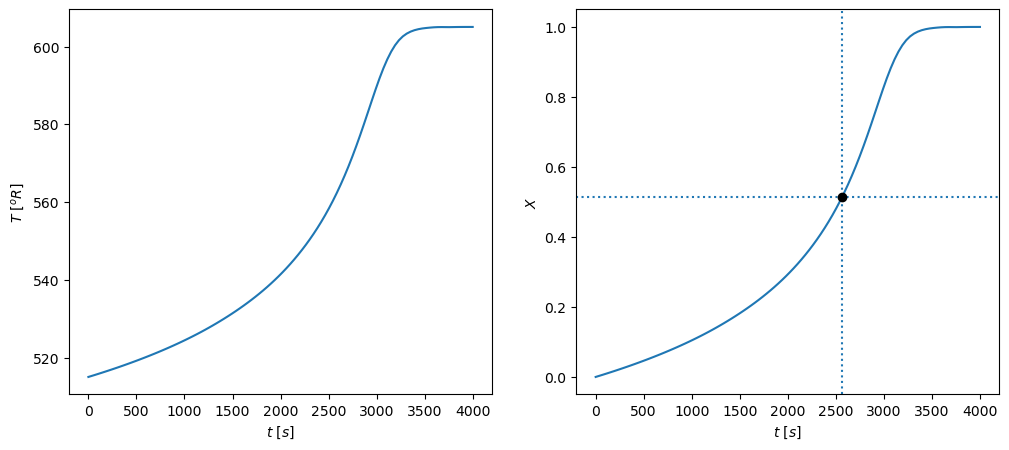

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d


def ode(t, params):
    X = params
    T = 515+90.1*X
    k = 0.000273*np.exp(16306*((1/535)-(1/T)))
    return k*(1-X)

t = np.linspace(0, 4000, 100)
x0 = np.array([0])

sol = solve_ivp(ode, [t[0], t[-1]], x0, t_eval=t)

X = sol.y[0]
T = 515+90.1*X

fig, ax = plt.subplots(ncols=2, figsize=(12,5))
ax[0].plot(sol.t, T)
ax[0].set_ylabel('$T~[^oR]$')
ax[0].set_xlabel('$t~[s]$')

ax[1].plot(sol.t, X)
ax[1].set_ylabel('$X$')
ax[1].set_xlabel('$t~[s]$')

y_desired = 0.515
x_desired = np.interp(y_desired, X, sol.t)

ax[1].axhline(y_desired, ls=':')
ax[1].axvline(x_desired, ls=':')
ax[1].plot(x_desired, y_desired, 'ko')

x_desired

### Analysis

The temperature-time and conversion-time trajectories show the reaction  going to completion. For 51.5% conversion we would need to quench the reactor at  2560s ( 40 minutes) from a temperature of 561 °F by rapidly lowering the temperature well below 515°R. We note that if the quench system fails, the temperature will  continue to increase above 580°R and the rate of the second reaction would become significant.